In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('Price.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [29]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
145,70,2,False,True,True,Saadat Abad,1800000000,60000.00
40,58,1,True,True,True,Saadat Abad,3400000000,113333.33
31,49,1,True,True,True,West Ferdows Boulevard,2200000000,73333.33
92,75,2,True,True,True,Pirouzi,2300000000,76666.67
74,63,1,True,True,True,Sattarkhan,2150000000,71666.67


In [30]:
type(df)

pandas.core.frame.DataFrame

In [31]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        150 non-null    int64  
 1   Room        150 non-null    int64  
 2   Parking     150 non-null    bool   
 3   Warehouse   150 non-null    bool   
 4   Elevator    150 non-null    bool   
 5   Address     150 non-null    object 
 6   Price       150 non-null    int64  
 7   Price(USD)  150 non-null    float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 6.4+ KB


In [33]:
df.describe()

,Area,Room,Price,Price(USD)
count,150.000000,150.000000,1.500000e+02,150.000000
mean,92.600000,1.946667,3.163967e+09,105465.577467
std,36.849048,0.702695,3.109839e+09,103661.311760
min,40.000000,0.000000,3.600000e+06,120.000000
25%,66.250000,2.000000,1.285000e+09,42833.335000
50%,85.000000,2.000000,2.200000e+09,73333.330000
75%,113.750000,2.000000,3.795000e+09,126500.000000
max,300.000000,3.000000,2.000000e+10,666666.670000


In [34]:
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        150 non-null    int64  
 1   Room        150 non-null    int64  
 2   Parking     150 non-null    bool   
 3   Warehouse   150 non-null    bool   
 4   Elevator    150 non-null    bool   
 5   Address     150 non-null    object 
 6   Price       150 non-null    int64  
 7   Price(USD)  150 non-null    float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 6.4+ KB


In [36]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
145,70,2,False,True,True,Saadat Abad,1800000000,60000.00
146,150,3,True,True,True,Golestan,20000000000,666666.67
147,95,2,True,True,True,Southern Janatabad,950000000,31666.67
148,127,2,True,True,True,Shahr-e-Ziba,6000000000,200000.00


In [37]:
df.shape

(150, 8)

In [38]:
print(df.dtypes)

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object


In [39]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [40]:
df.dropna(inplace=True)

In [41]:
df.shape

(150, 8)

In [42]:
df['Parking'].value_counts(normalize=True)*100

True     82.666667
False    17.333333
Name: Parking, dtype: float64

In [43]:
pd.crosstab( df.Parking, df.Room )

Room,0,1,2,3
Parking,,,,
False,2,8,14,2
True,0,27,68,29


In [44]:
below_85 = df[ df.Area <= 85 ]
len(below_85)

77

In [46]:
df[ df.Area <= 85 ]["Parking"].value_counts( )

True     59
False    18
Name: Parking, dtype: int64

In [47]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [48]:
len(df.Address.unique())

66

In [49]:
round(df.Price.mean())

3163967333

In [50]:
df.groupby( 'Room' )['Price'].mean()

Room
0    2.065000e+08
1    1.843246e+09
2    2.623945e+09
3    6.274355e+09
Name: Price, dtype: float64

In [51]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [52]:
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,206500000
1,1,False,784200000
2,1,True,2157037037
3,2,False,998928571
4,2,True,2958507353
5,3,False,560000000
6,3,True,6668448276


In [53]:
df2 = df.copy()

In [54]:
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)

In [55]:
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000",61667
1,60,1,True,True,True,Shahran,"1,850,000,000",61667
2,79,2,True,True,True,Pardis,"550,000,000",18333
3,95,2,True,True,True,Shahrake Qods,"902,500,000",30083
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000",233333
...,...,...,...,...,...,...,...,...
145,70,2,False,True,True,Saadat Abad,"1,800,000,000",60000
146,150,3,True,True,True,Golestan,"20,000,000,000",666667
147,95,2,True,True,True,Southern Janatabad,"950,000,000",31667
148,127,2,True,True,True,Shahr-e-Ziba,"6,000,000,000",200000


In [56]:
df.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object

<Figure size 800x500 with 0 Axes>

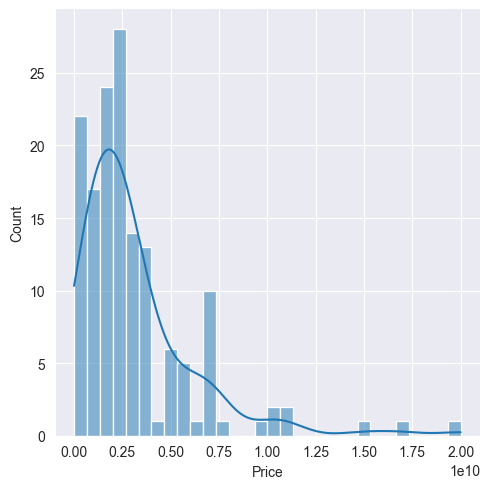

In [57]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )

<AxesSubplot: >

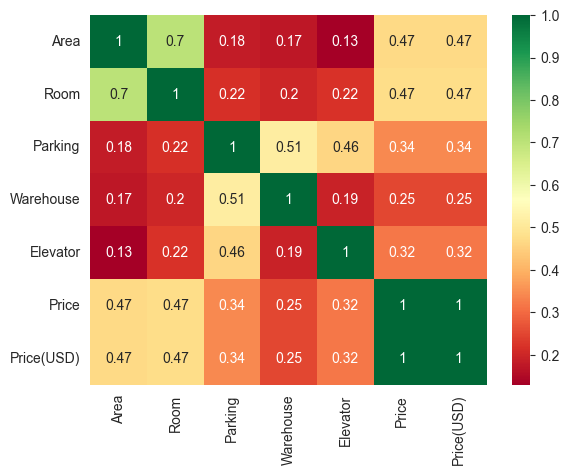

In [58]:
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')

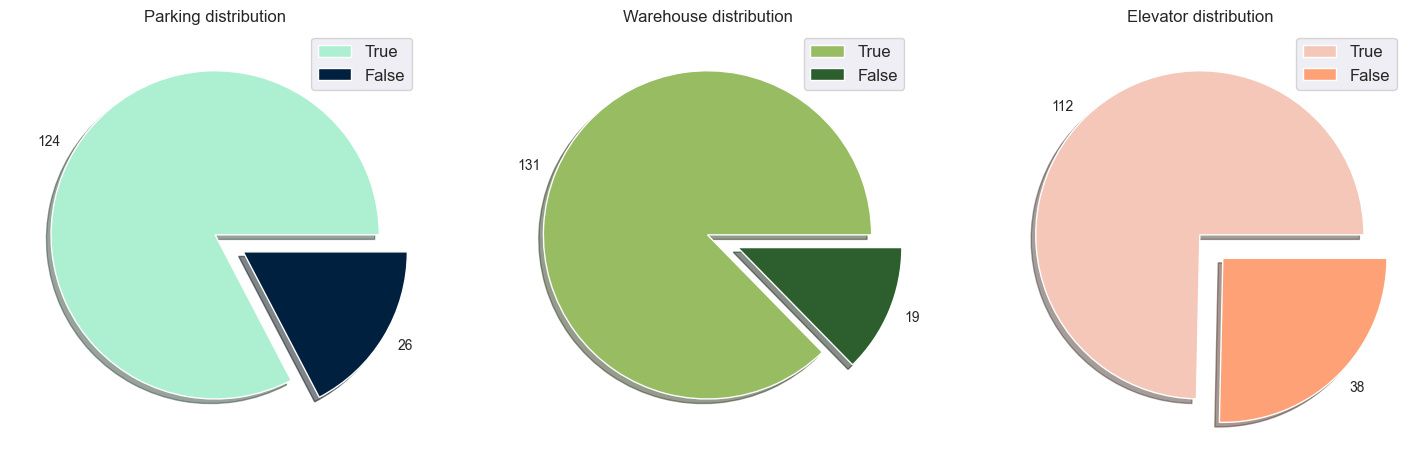

In [59]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
    data = df[columns[i]].value_counts()
    ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
    ax[i].legend(labels=data.index, fontsize='large')
    ax[i].set_title('{} distribution'.format(columns[i]))

In [60]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]

Text(0.5, 1.0, 'Number of flats in location')

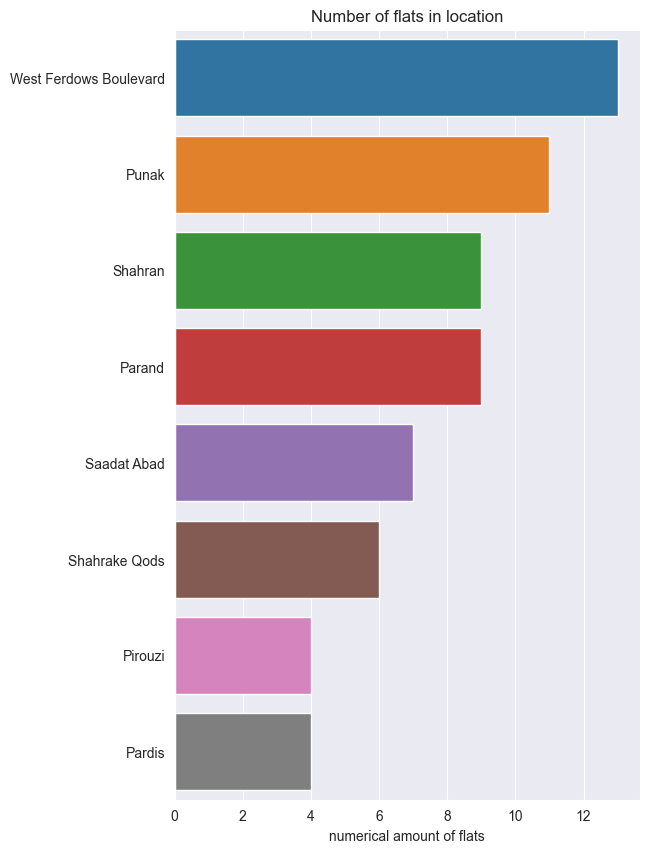

In [61]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')

In [62]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [63]:
df.sort_values('Price',ascending=False)[['Address']].head(20)

,Address
146,Golestan
102,Shahrake Qods
25,Velenjak
115,Parand
13,Saadat Abad
82,Shahran
76,Shahran
52,Parand
32,Zargandeh
121,Keshavarz Boulevard


In [64]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [65]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333
...,...,...,...,...,...,...,...,...
145,70,2,False,True,True,Saadat Abad,1800000000,60000
146,150,3,True,True,True,Golestan,20000000000,666667
147,95,2,True,True,True,Southern Janatabad,950000000,31667
148,127,2,True,True,True,Shahr-e-Ziba,6000000000,200000


In [66]:
df = df.drop(columns = ['Price(USD)'])
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [67]:
print(f"Skewness of features:\n{df.skew()}")

Skewness of features:
Area         2
Room        -0
Parking     -2
Warehouse   -2
Elevator    -1
Price        3
dtype: float64


<AxesSubplot: xlabel='Price'>

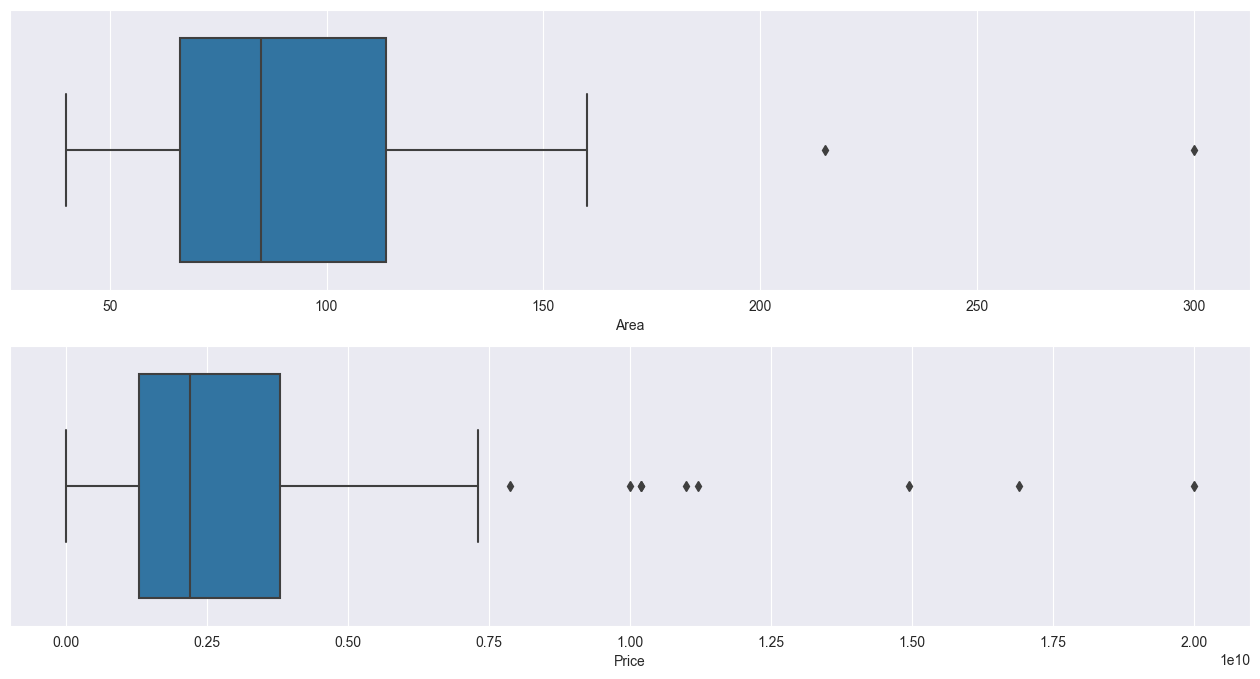

In [68]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

In [69]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -5.00
Upper limit for area: 185.00
Lower limit for price: -2,480,000,000.0
Upper limit for price: 7,560,000,000.0


In [70]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 2
Number of price outliers: 9
Number of outliers: 11
